In [36]:
import pandas as pd
import scipy as sc
import sklearn as sk

import matplotlib.pyplot as pl
import seaborn as sns

from skimage import measure

%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

In [6]:
# Load the data
train = pd.read_csv("digit-recognizer/train.csv")
test = pd.read_csv("digit-recognizer/test.csv")



In [32]:
# data adjustments (following some ideas 
# from https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6)

y_train = train['label']

x_train = train.drop(labels=['label'], axis=1)
x_train = 1-x_train/255.0
x_train = x_train.values.reshape(-1,28,28)


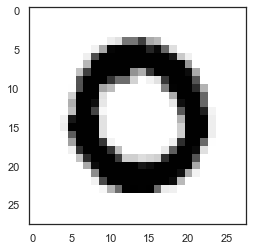

In [61]:
pl.imshow(x_train[1][:,:], cmap=pl.cm.gray)


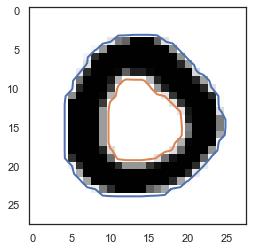

In [98]:
# Let's find some contours
r = x_train[4][:,:]
contours = measure.find_contours(r,0.9)
fig, ax = pl.subplots()
ax.imshow(r, cmap=pl.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)



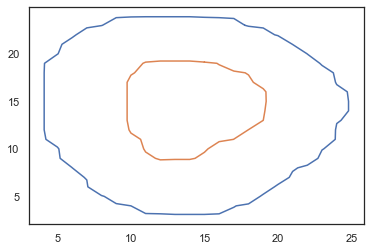

In [114]:
for n, contour in enumerate(contours):
    pl.plot(contour[:,1], contour[:,0])

What remains:

1. Create a mesh of points in the area defined by the contours. 
2. Estimate the Laplacian on the mesh and solve for the eigenvalues

